In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train.shape

(33600, 784)

In [8]:
#without pca

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [10]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9651190476190477

In [13]:
#with pca

In [14]:
#1) standaize data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.decomposition import PCA

In [16]:
X_train.shape

(33600, 784)

In [17]:
pca = PCA(n_components=100)   #if n_compnents=none means will take all columns we are converting 784 col to 100

In [18]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
pca.explained_variance_[0:5]   ## the actual eigenvalues (variance)

array([40.71663636, 29.14088312, 26.81721425, 20.82245133, 18.12084538])

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05799918, 0.09950917, 0.1377092 , 0.16736993, 0.19318233,
       0.21565205, 0.23536973, 0.25323744, 0.26894271, 0.2832955 ,
       0.29697313, 0.30931628, 0.32079432, 0.33198755, 0.34263651,
       0.35281073, 0.36236378, 0.37176443, 0.38094669, 0.38993119,
       0.39843838, 0.40665785, 0.41450095, 0.42210339, 0.42945666,
       0.43655133, 0.44355609, 0.450308  , 0.45670488, 0.46297778,
       0.46917101, 0.47522194, 0.48111835, 0.48692388, 0.49264467,
       0.49820118, 0.50366396, 0.50896769, 0.51409261, 0.51909919,
       0.52401647, 0.52886585, 0.53358587, 0.53822773, 0.54279646,
       0.54729329, 0.55176703, 0.55619947, 0.56061408, 0.56490979,
       0.56913688, 0.57330431, 0.57741157, 0.58142963, 0.58541766,
       0.58939686, 0.59329271, 0.59705639, 0.60078256, 0.60447443,
       0.60808849, 0.61164524, 0.61515778, 0.61862675, 0.62204797,
       0.62541915, 0.62877604, 0.63208907, 0.63529418, 0.63847911,
       0.64162164, 0.64472582, 0.64779632, 0.6508323 , 0.65385

In [21]:
# 40.7166363/pca.explained_variance_.sum()

In [22]:
clf.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [23]:
y_pred = clf.predict(X_test_pca)

In [24]:
accuracy_score(y_test,y_pred)

0.9517857142857142

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,784):   #for all columns fom 1 to 784 checking accuracy
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_pca,y_train)
    y_pred = clf.predict(X_test_pca)
    print(accuracy_score(y_test,y_pred))
    

0.25583333333333336
0.3238095238095238
0.5119047619047619
0.6725
0.7375
0.8226190476190476
0.8380952380952381
0.8679761904761905
0.8809523809523809
0.9041666666666667
0.9122619047619047
0.9177380952380952
0.9220238095238096
0.9285714285714286
0.9333333333333333
0.934047619047619
0.9376190476190476
0.935952380952381
0.9372619047619047
0.9392857142857143
0.9398809523809524
0.9394047619047619
0.9397619047619048
0.9408333333333333
0.9414285714285714
0.9426190476190476
0.945595238095238
0.9461904761904761
0.9469047619047619
0.9460714285714286
0.945952380952381
0.9475
0.9458333333333333
0.9476190476190476
0.9492857142857143
0.9494047619047619
0.9496428571428571
0.95
0.9491666666666667
0.9507142857142857
0.9496428571428571
0.9498809523809524
0.949047619047619


In [25]:
X_train_pca.shape

(33600, 100)

In [26]:
X_train_pca[:,0:2]

array([[-0.84758278,  1.7467128 ],
       [-2.20901913, -5.39659931],
       [-4.1908161 ,  0.60897537],
       ...,
       [ 4.46291397, -0.63838662],
       [-4.50160802, -1.1969187 ],
       [ 0.119429  ,  0.96089039]])

In [27]:
import matplotlib.pyplot as plt

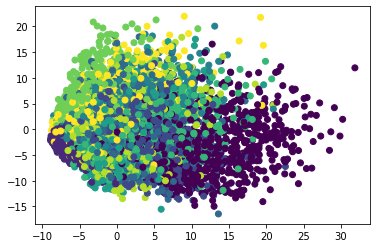

In [28]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test,cmap='viridis')

In [29]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [30]:
import matplotlib.pyplot as plt

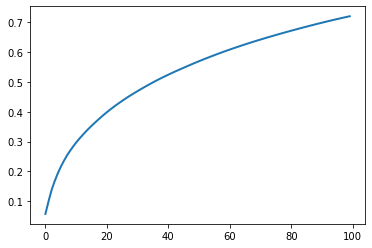

In [31]:
plt.plot(cum_var_explained,linewidth=2)  #x axis components and y axis variance explained

In [32]:
pca.explained_variance_[0:5]/np.sum(pca.explained_variance_)

array([0.0806151 , 0.0576962 , 0.05309556, 0.04122649, 0.03587757])

In [33]:
pca.explained_variance_ratio_[0:5]

array([0.05799918, 0.04150999, 0.03820002, 0.02966073, 0.0258124 ])